In [1]:
import pandas as pd
import geopandas
import numpy as np

%matplotlib inline

# load data
crosswalks = pd.read_csv("crosswalks_and_neighborhoods.csv", 
                                       index_col="_id") # use the column named _id as the row index

In [2]:
crosswalks.head(10)

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,
1,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
2,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
3,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
4,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
5,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267
6,768755224,Crosswalk - Two Lined,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443852,-79.939028
7,1308677189,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443965,-79.938673
8,1159710354,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.445632,-79.931342
9,216672403,Crosswalk - Continental,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-9,40.444583,-79.945557


In [3]:
#query_mask = crosswalks_pandas["type"] == 

#crosswalks_pandas.pivot(columns="neighborhood", values="type").head()
#crosswalks_pandas.plot()

# finds the total number of crosswalks for each neighborhood
neigh_dict = {}
cross_types_dict = {}
bricks_dict = {}

for index, row in crosswalks.iterrows():
    neigh_name = row["neighborhood"]
    cross_name = row["type"]
    
    # if the neighborhood is not in the dictionary, set it equal to 1
    if (neigh_name not in neigh_dict):
        neigh_dict[neigh_name] = 1
        # if the crosswalk found is brick, adds it to the bricks dictionary (key=neighborhood, value=quantity)
        if ("Brick" in cross_name):
            bricks_dict[neigh_name] = 1
    # else, if the item already exists in the dictionary add 1
    elif (neigh_name in neigh_dict):
        neigh_dict[neigh_name] += 1
        # if the crosswalk found is brick, adds 1 to the bricks dictionary (key=neighborhood, value=quantity)
        if ("Brick" in cross_name):
            if (neigh_name not in bricks_dict):
                bricks_dict[neigh_name] = 1
            elif (neigh_name in bricks_dict):
                bricks_dict[neigh_name] += 1

# finds how many times each type of crosswalk appears
for index, row in crosswalks.iterrows():
    cross_name = row["type"]
    
    # if the neighborhood is not in the dictionary, set it equal to 1
    if (cross_name not in cross_types_dict):
        cross_types_dict[cross_name] = 1
    # else, if the item already exists in the dictionary add 1
    elif (cross_name in cross_types_dict):
        cross_types_dict[cross_name] += 1
        
        
print(neigh_dict)
print("\n")
print(cross_types_dict)
print("\n")
print(bricks_dict)

{'Central Business District': 402, 'Strip District': 114, 'Morningside': 33, 'Squirrel Hill North': 112, 'Squirrel Hill South': 239, 'Shadyside': 190, 'Polish Hill': 29, 'North Oakland': 125, 'West Oakland': 41, 'Central Oakland': 113, 'East Liberty': 146, 'Bloomfield': 192, 'South Oakland': 66, 'Stanton Heights': 22, 'Terrace Village': 67, 'Highland Park': 64, 'Bluff': 82, 'Lincoln-Lemington-Belmar': 29, 'Lincoln Place': 15, 'Lower Lawrenceville': 40, 'Crawford-Roberts': 63, 'Middle Hill': 59, 'Bedford Dwellings': 8, 'Upper Hill': 21, 'Point Breeze': 91, 'Larimer': 58, 'Point Breeze North': 53, 'Homewood West': 20, 'Homewood North': 40, 'Homewood South': 81, 'East Hills': 21, nan: 14, 'Friendship': 37, 'Regent Square': 15, 'South Side Flats': 262, 'South Shore': 15, 'Swisshelm Park': 7, 'Greenfield': 68, 'Hazelwood': 68, 'Glen Hazel': 7, 'Elliott': 25, 'Hays': 7, 'Esplen': 15, 'New Homestead': 1, 'Central Lawrenceville': 81, 'West End': 24, 'Troy Hill': 40, 'East Allegheny': 60, 'Spri

In [4]:
# total neighborhoods for the only 4 neighborhoods with brick crosswalks
totals_dict = {}
totals_dict["Central Business District"] = neigh_dict["Central Business District"]
totals_dict["North Shore"] = neigh_dict["North Shore"]
totals_dict["Chateau"] = neigh_dict["Chateau"]
totals_dict["South Side Flats"] = neigh_dict["South Side Flats"]

print(totals_dict)

{'Central Business District': 402, 'North Shore': 75, 'Chateau': 29, 'South Side Flats': 262}


In [5]:
# proportion of each neighborhoods brick to total crosswalks
prop_dict = {}
prop_dict["Central Business District"] = bricks_dict["Central Business District"] / totals_dict["Central Business District"]
prop_dict["North Shore"] = bricks_dict["North Shore"] / totals_dict["North Shore"]
prop_dict["Chateau"] = bricks_dict["Chateau"] / totals_dict["Chateau"]
prop_dict["South Side Flats"] = bricks_dict["South Side Flats"] / totals_dict["South Side Flats"]

print(prop_dict)

{'Central Business District': 0.3781094527363184, 'North Shore': 0.41333333333333333, 'Chateau': 0.10344827586206896, 'South Side Flats': 0.030534351145038167}


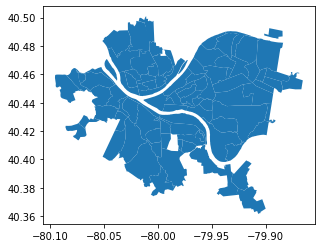

In [14]:
#creates a dataframe 

#num_crosswalks = crosswalks.groupby
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe